# matplotlib处理文本

采用matplotlib处理文本数据并可视化展现出

matplotlib 对文本的支持十分完善，包括数学公式，Unicode 文字，栅格和向量化输出，文字换行，文字旋转等一系列操作

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 基础文本函数

在 matplotlib.pyplot 中，基础的文本函数如下：

text() 在 Axes 对象的任意位置添加文本

xlabel() 添加 x 轴标题

ylabel() 添加 y 轴标题

title() 给 Axes 对象添加标题

figtext() 在 Figure 对象的任意位置添加文本

suptitle() 给 Figure 对象添加标题

anotate() 给 Axes 对象添加注释（可选择是否添加箭头标记）

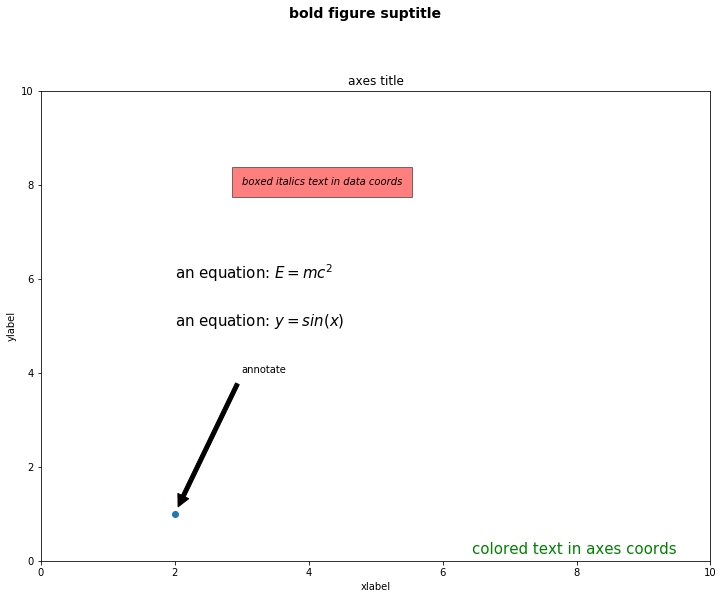

In [12]:
# -*- coding: utf-8 -*-
# plt.figure() 返回一个 Figure() 对象
fig = plt.figure(figsize=(12, 9))

# 设置这个 Figure 对象的标题
# 事实上，如果我们直接调用 plt.suptitle() 函数，它会自动找到当前的 Figure 对象
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# Axes 对象表示 Figure 对象中的子图
# 这里只有一幅图像，所以使用 add_subplot(111)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

# 可以直接使用 set_xxx 的方法来设置标题
ax.set_title('axes title')
# 也可以直接调用 title()，因为会自动定位到当前的 Axes 对象
# plt.title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 添加文本，斜体加文本框
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

# 数学公式，用 $$ 输入 Tex 公式
ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
ax.text(2, 5, r'an equation: $y = sin(x) $', fontsize=15)

# 颜色，对齐方式
ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

# 注释文本和箭头
ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

# 设置显示范围
ax.axis([0, 10, 0, 10])

plt.show()

在文本函数中设置文本的属性：va, ha, multialignment 可以用来控制布局。

horizontalalignment or ha ：x 位置参数表示的位置

verticalalignment or va：y 位置参数表示的位置

multialignment：多行位置控制

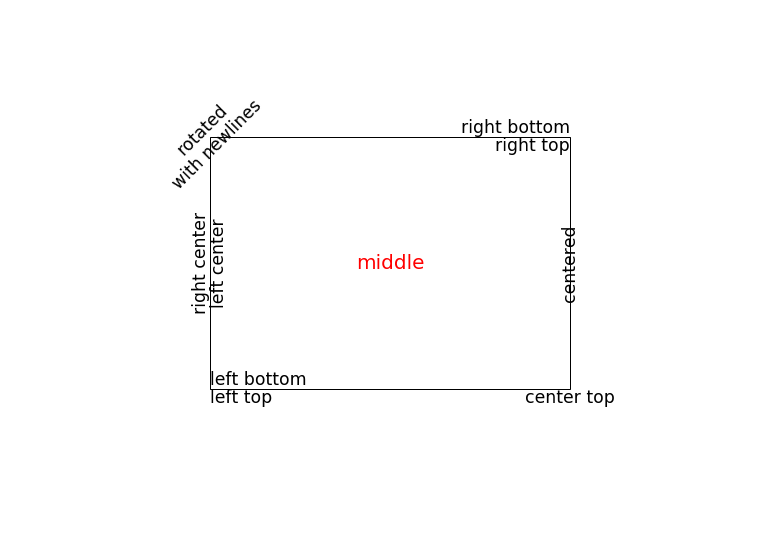

In [14]:
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

ax.text(left, bottom, 'left top',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes,
        size='xx-large')

ax.text(left, bottom, 'left bottom',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes,
        size='xx-large')

ax.text(right, top, 'right bottom',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes,
        size='xx-large')

ax.text(right, top, 'right top',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
        size='xx-large')

ax.text(right, bottom, 'center top',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes,
        size='xx-large')

ax.text(left, 0.5*(bottom+top), 'right center',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes,
        size='xx-large')

ax.text(left, 0.5*(bottom+top), 'left center',
        horizontalalignment='left',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes,
        size='xx-large')

ax.text(0.5*(left+right), 0.5*(bottom+top), 'middle',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)

ax.text(right, 0.5*(bottom+top), 'centered',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes,
        size='xx-large')

ax.text(left, top, 'rotated\nwith newlines',
        horizontalalignment='center',
        verticalalignment='center',
        rotation=45,
        transform=ax.transAxes,
        size='xx-large')

ax.set_axis_off()
plt.show()

## 注释文本
text() 函数在 Axes 对象的指定位置添加文本，而 annotate() 则是对某一点添加注释文本，需要考虑两个位置：一是注释点的坐标 xy ，二是注释文本的位置坐标 xytext：

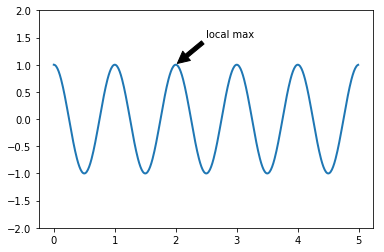

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(2.5, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set_ylim(-2,2)
plt.show()

### 极坐标系注释文本
产生极坐标系需要在 subplot 的参数中设置 polar=True：

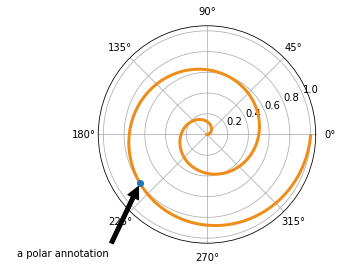

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2*2*np.pi*r
line,  = ax.plot(theta, r, color='#ee8d18', lw=3)


# 极坐标注释文本
ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )

plt.show()

# 处理文本（数学表达式）
在字符串中使用一对 $$ 符号可以利用 Tex 语法打出数学表达式，而且并不需要预先安装 Tex。在使用时我们通常加上 r 标记表示它是一个原始字符串（raw string）

### 特殊字符表
https://matplotlib.org/users/mathtext.html#symbols

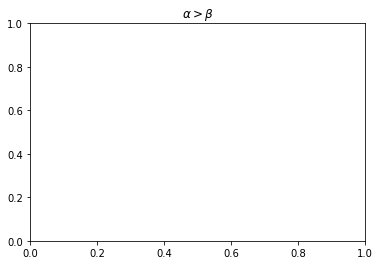

In [23]:
# math text
plt.title(r'$\alpha > \beta$')

plt.show()

#### 上下标
使用 _ 和 ^ 表示上下标：

$\alpha_i > \beta_i$' 

In [ ]:
r'$\alpha_i > \beta_i$'

$\sum_{i=0}^\infty x_i$'

In [ ]:
r'$\sum_{i=0}^\infty x_i$'

注：

希腊字母和特殊符号可以用 '\ + 对应的名字' 来显示
{} 中的内容属于一个部分；要打出花括号是需要使用 \{\}

#### 分数，二项式系数，stacked numbers

r'$\frac{3}{4}, \binom{3}{4}, \stackrel{3}{4}$'

r'$\frac{5 - \frac{1}{x}}{4}$'

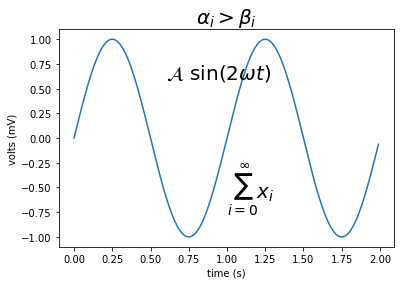

In [6]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t,s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$\mathcal{A}\ \mathrm{sin}(2 \omega t)$',
         fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()